### Handwritten image dataset

##### import tensorflow and MNIST dataset under the Keras API.

In [2]:
import tensorflow as tf

# using mnist dataset , 28x28 images of hand-written digits 0-9  
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()   # now we unpack the data

##### The MNIST database contains 60,000 training images and 10,000 testing images.
##### x_train and x_test : contain greyscale RGB codes (from 0 to 255) 
##### y_train and y_test : contains labels from 0 to 9 which represents which numbers they actually are.

####  visualize these numbers

9


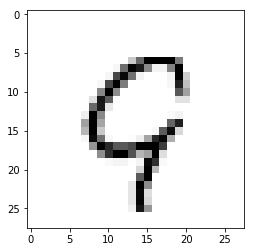

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

image_index = 782            # select any number up to 60,000
print(y_train[image_index])   # prints the label of number 

plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

#### 60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixels.

In [8]:
x_train.shape

(60000, 28, 28)

## Reshape and Normalizing

##### The dataset is in 3-dimension, to use the dataset in Keras API need of 4-dims numpy arrays.
##### Also normalize the data by dividing by 255

In [9]:
# Reshaping the array to 4-dim
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
# Normalizing by dividing it to the max RGB value 255

x_train = x_train/255
x_test = x_test/255

print('x_train shape:', x_train.shape)
print('Number of images in x_train :', x_train.shape[0])
print('Number of images in x_test :', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train : 60000
Number of images in x_test : 10000


### Building the CNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))     # input_shape = (28, 28, 1)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())            # Flattening the 2D arrays to 1D array for fully connected layers

model.add(Dense(128, activation=tf.nn.relu))    # 1st Dense layer (Hidden layer)
model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))   # final Dense layer

#### We can take any number for the first Dense layer, But the final Dense layer must have 10 neurons bcoz we have 10 number classes (0 to 9).

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


### Compile and fit the model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=5)   

Epoch 1/5
60000/60000 [==============================] - 133s 2ms/step - loss: 0.5844 - acc: 0.8231A: 7:50 - loss: 2.3034 - acc: - ETA: 5:22 - loss: 2.3034 - ac - ETA: 4:10 - loss: 2.3002 - acc: 0.11 - ETA: 4:01 - loss: 2.3008 - acc: 0.1 - ETA: 3:47 - loss: 2.3010 - acc: 0. - ETA: 3:34 - loss: 2.3020 - acc - ETA: 3:16 - loss: 2.3016 - acc: 0 - ETA: 3:07 - loss: 2.3014 - acc: 0.11 - ETA: 3:04 - loss: 2.3012 - acc: 0.118 - ETA: 3:03 - loss: 2.3013 - acc: 0.1 - ETA: 2:59 - loss: 2.3003 - acc:  - ETA: 2:52 - loss: 2.3007 - acc: 0.11 - ETA: 2:50 - loss: 2.3005 - acc: 0. - ETA: 2:47 - loss: 2.3001 - acc: 0.1 - ETA: 2:44 - loss: 2.2998 - acc: 0.11 - ETA: 2:42 - loss: 2.2994 - acc:  - ETA: 2:38 - loss: 2.2976 - acc:  - ETA: 2:36 - loss: 2.2953 - acc: 0. - ETA: 2:34 - loss: 2.2937 -  - ETA: 2:29 - loss: 2.2876 - acc: - ETA: 2:26 - loss: 2.2823 - acc: - ETA: 2:24 - loss: 2.2750 - acc: - ETA: 2:22 - loss: 2.2682 - acc: 0. - ETA: 2:21 - loss: 2.2628 - ac - ETA: 2:18 - loss: 2.2491 - acc: 0.21 - ET

60000/60000 [==============================] - 127s 2ms/step - loss: 0.1105 - acc: 0.9670A: 2:13 - loss: 0.1083 - acc: 0 - ETA: 2:12 - loss: 0.1076 - acc: 0.964 - ETA: 2:12 - loss: 0.1060 - acc: 0.965 - ETA: 2:11 - loss: 0.1044 - acc: 0.9 - ETA: 2:11 - loss: 0.1013 - acc: 0.96 - ETA: 2:10 - loss: 0.1065 - acc: 0.967 - ETA: 2:10 - loss: 0.1057 - acc: 0.9 - ETA: 2:09 - loss: 0. - ETA: 2:05 - loss: 0.1040 - acc: 0.966 - ETA: 2:04 - loss: 0.1090 - acc:  - ETA: 2:03 - loss: 0.1086 - acc: 0.964 - ETA: 2:03 - loss: 0.1075 - ac - ETA: 2:02 - loss: 0.1033 - a - ETA: 2:02 - loss: 0.1050 - acc: 0.9 - ETA: 2:02 - loss: 0.1047 - acc: 0.9 - ETA: 2:01 - loss: 0.1080 - acc: 0.966 - ETA: 2:01 - loss: 0.1074 - acc:  - ETA: 2:00 - loss: 0.1101 - acc: 0.965 - ETA: 2:00 - loss: 0.1104 -  - ETA: 1:59 - loss: 0.1144 - acc: 0.96 - ETA: 1:59 - loss: 0.1146 - acc: 0.963 - ETA: 1:59 - loss: 0.114 - ETA: 1:57 - loss: 0.1161 - acc - ETA: 1:56 - loss: 0.1193 - acc: 0.96 - ETA: 1:56 - loss: 0.1182 -  - ETA: 1:55 - l

### Evaluate the model

In [30]:
# Now calculate the validation loss and validation accuracy

val_loss, val_acc = model.evaluate(x_test, y_test)

print('\n validation loss is : ', val_loss)
print(f'validation accuracy : {val_acc : 0.2%}')

10000/10000 [==============================] - 12s 1ms/step

 validation loss is :  0.08774380932422354
validation accuracy :  97.38%


##### Evaluation shows : 97.38%  accuracy with basic model.

##### In many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. 

### Make some predictions

4


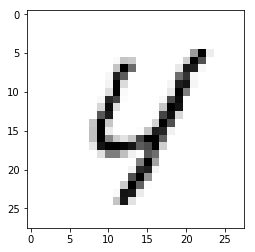

In [27]:
image_index = 555       

pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

## --------------------------------------------------------------------------------

## RNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM   

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()            # x_train, x_test : give them in tuple

x_train = x_train/255.0
x_test = x_test/255.0

In [2]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


#### Bulding RNN (LSTM)

In [3]:
# CuDNNLSTM: is fast & run on GPU, it use: tanh activation
# use : CuDNNLSTM inplace of LSTM, and remove 'activation' function from layers

model = Sequential()                      

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True)) 
# return_sequence : if going to next layer need it, if going to Dense layer then 'no need' of this
model.add(Dropout(0.2))   # its 20%

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))   

# Now compile
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-5)   # deacay makes steps bit smaller to learn better of learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))      # change epochs accordingly

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 565s 9ms/sample - loss: 0.5887 - acc: 0.8102 - val_loss: 0.1369 - val_acc: 0.9597
Epoch 2/3
60000/60000 [==============================] - 547s 9ms/sample - loss: 0.1572 - acc: 0.9570 - val_loss: 0.0925 - val_acc: 0.9739
Epoch 3/3
60000/60000 [==============================] - 571s 10ms/sample - loss: 0.1079 - acc: 0.9709 - val_loss: 0.0669 - val_acc: 0.9795


### Evaluate the mdoel

In [4]:
# calculate the validation loss and validation accuracy

val_loss, val_acc = model.evaluate(x_test, y_test) 

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0669 - acc: 0.979514s - loss: 0.0932 - - ETA: 13s - loss: 0.09 - ETA: 13s - loss: 0.09 - ETA: 12s - loss: 0.0968 - - ETA: 12s -  - ETA: 1 - ETA: 9s - loss: 0.0865  - ETA: 5s - loss: 0.0766 -  - ETA: 4s - loss - ETA: 2s - los - ETA: 1s - loss: 0.0676 


In [5]:
print('validation loss : ', val_loss)
print(f'validation accuracy : {val_acc : 0.2%}')

validation loss :  0.0669349164525629
validation accuracy :  97.95%
